<a href="https://colab.research.google.com/github/kerenalli/DATA_MINING/blob/main/20210225_Phishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DataSet/Website Phishing.csv')

In [3]:
df.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [4]:
a=len(df[df.Result==0])
b=len(df[df.Result==-1])
c=len(df[df.Result==1])

In [5]:
print("Count of Legitimate Websites = ", b)
print("Count of Suspicious Websites = ", a)
print("Count of Phishy Websites = ", c)

Count of Legitimate Websites =  702
Count of Suspicious Websites =  103
Count of Phishy Websites =  548


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e02a8d310>,
      dtype=object)

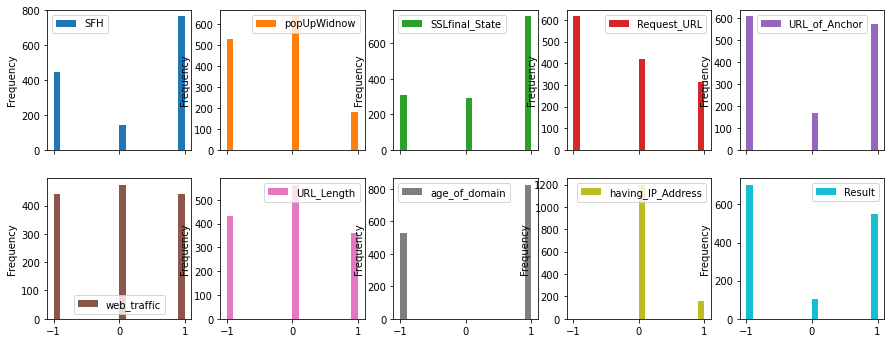

In [7]:
df.plot.hist(subplots=True, layout=(5,5), figsize=(15, 15), bins=20)

In [8]:
#Correlation Matrix
df.corr()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
SFH,1.000000,0.375943,0.368690,0.257247,0.333703,-0.187082,0.151503,0.163182,0.043349,-0.678277
popUpWidnow,0.375943,1.000000,0.218050,0.111520,0.167760,-0.140407,0.136229,0.076815,0.123399,-0.509749
SSLfinal_State,0.368690,0.218050,1.000000,0.057239,0.088525,-0.171719,0.095055,0.208091,0.108000,-0.518762
Request_URL,0.257247,0.111520,0.057239,1.000000,0.337277,-0.045858,0.048431,0.053348,0.013346,-0.271609
URL_of_Anchor,0.333703,0.167760,0.088525,0.337277,1.000000,-0.092045,0.097581,0.069178,0.039412,-0.287007
web_traffic,-0.187082,-0.140407,-0.171719,-0.045858,-0.092045,1.000000,-0.108204,-0.683857,-0.094957,0.243896
URL_Length,0.151503,0.136229,0.095055,0.048431,0.097581,-0.108204,1.000000,0.075338,0.165152,-0.183061
age_of_domain,0.163182,0.076815,0.208091,0.053348,0.069178,-0.683857,0.075338,1.000000,0.040379,-0.231931
having_IP_Address,0.043349,0.123399,0.108000,0.013346,0.039412,-0.094957,0.165152,0.040379,1.000000,-0.059225
Result,-0.678277,-0.509749,-0.518762,-0.271609,-0.287007,0.243896,-0.183061,-0.231931,-0.059225,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


In [10]:
#Creating the data set
x = df.drop('Result',axis=1).values 
y = df['Result'].values

In [11]:
from sklearn import tree

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=10)

print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 811 samples.
Testing set has 542 samples.


In [14]:
model_tree = tree.DecisionTreeClassifier()
model = model_tree.fit(x_train, y_train)

In [15]:
features = ('SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor',	'web_traffic',	'URL_Length',	'age_of_domain',	'having_IP_Address')
name = ('Phishing', 'Suspicious', 'Legitimate')

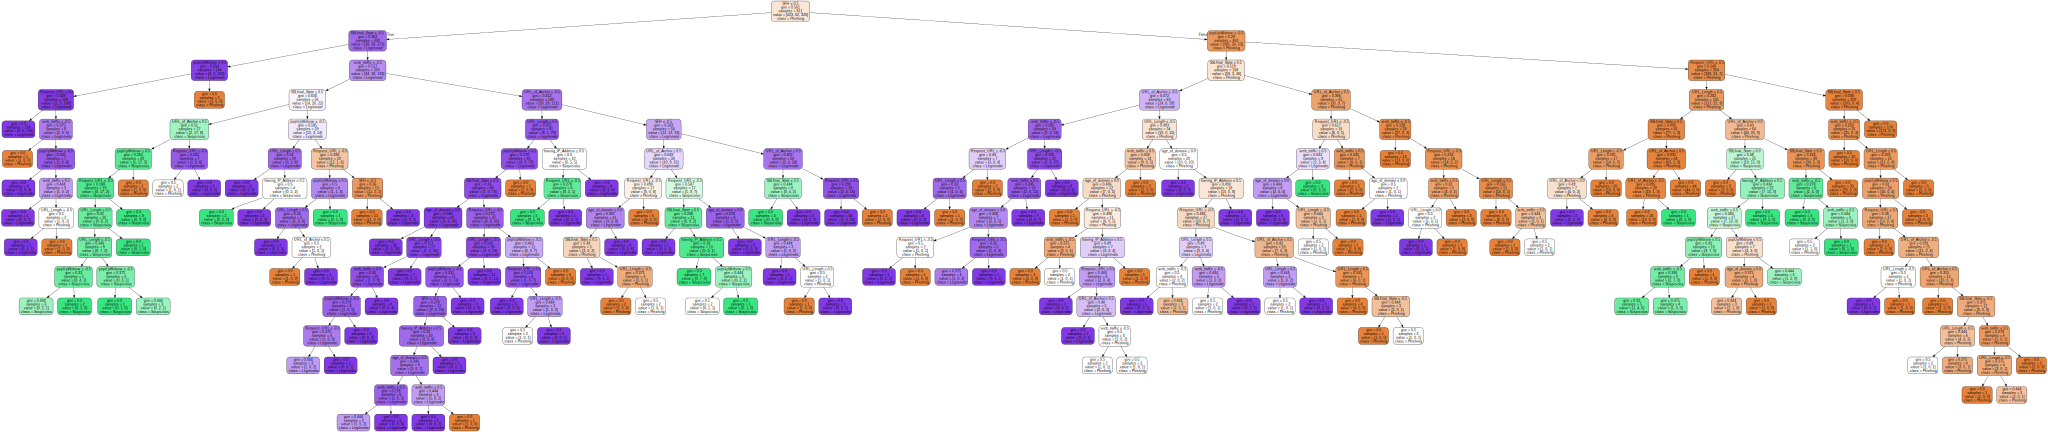

In [16]:
#Decision Tree
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names = features, class_names =  name,
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
 
#Test the model using testing data
predictions = model.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,predictions)

array([[256,   0,  23],
       [  8,  32,   1],
       [ 24,   9, 189]])

In [19]:
print("f1 score is ",f1_score(y_test,predictions,average='weighted'))
print("The accuracy of Decision Tree Algorithm on testing data is: ",100.0 *accuracy_score(y_test,predictions))

f1 score is  0.8797912412621663
The accuracy of Decision Tree Algorithm on testing data is:  88.00738007380073


In [74]:
from sklearn.datasets import make_classification
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from tensorflow.keras.models import load_model
# split into train test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
# scale data
t = StandardScaler()
t.fit(x_train)
x_train = t.transform(x_train)
x_test = t.transform(x_test)
# define model
model = XGBClassifier()
# fit model on training set
model.fit(x_train, y_train)
# make prediction on test set
yhat = model.predict(x_test)
# calculate accuracy
acc = accuracy_score(y_test, yhat)
print("\nAccuracy of Logistic Regression is: ")
print(acc)

clf = svm.SVC()
clf.fit(x_train, y_train)
# calculate accuracy
acc = accuracy_score(y_test, yhat)
print("\nAccuracy of SVM is: ")
print(acc)


Accuracy of Logistic Regression is: 
0.896551724137931

Accuracy of SVM is: 
0.896551724137931


In [64]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(x_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 256)               2560      
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)              

In [66]:
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=METRICS)

r = model.fit(
    x_train, y_train, 
    validation_data=(x_test, y_test),
    batch_size=32, 
    epochs=100, 
#     class_weight=class_weight,
    callbacks=callbacks,
)

Epoch 1/100
30/30 [==============================] - 4s 30ms/step - loss: -365.8302 - fn: 266.4516 - fp: 25.9677 - tn: 17.1290 - tp: 200.5806 - precision: 0.8698 - recall: 0.4250 - val_loss: -413.4533 - val_fn: 221.0000 - val_fp: 19.0000 - val_tn: 9.0000 - val_tp: 157.0000 - val_precision: 0.8920 - val_recall: 0.4153
Epoch 2/100
30/30 [==============================] - 0s 7ms/step - loss: -395.4746 - fn: 260.7742 - fp: 22.4194 - tn: 19.4839 - tp: 207.4516 - precision: 0.8991 - recall: 0.4411 - val_loss: -434.9273 - val_fn: 222.0000 - val_fp: 18.0000 - val_tn: 10.0000 - val_tp: 156.0000 - val_precision: 0.8966 - val_recall: 0.4127
Epoch 3/100
30/30 [==============================] - 0s 10ms/step - loss: -414.4002 - fn: 260.2258 - fp: 19.4839 - tn: 19.1613 - tp: 211.2581 - precision: 0.9240 - recall: 0.4547 - val_loss: -449.3375 - val_fn: 222.0000 - val_fp: 17.0000 - val_tn: 11.0000 - val_tp: 156.0000 - val_precision: 0.9017 - val_recall: 0.4127
Epoch 4/100
30/30 [=======================

In [67]:
score = model.evaluate(x_test, y_test)
print(score)

13/13 [==============================] - 0s 2ms/step - loss: -5371.0186 - fn: 233.0000 - fp: 15.0000 - tn: 13.0000 - tp: 145.0000 - precision: 0.9062 - recall: 0.3836
[-5371.0185546875, 233.0, 15.0, 13.0, 145.0, 0.90625, 0.38359788060188293]


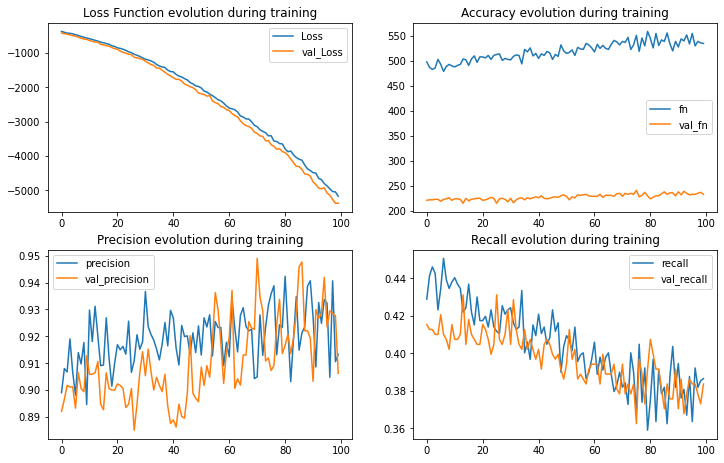

In [68]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

In [70]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print(acc)


0.8620689655172413
